# K-Means Clustering Demo — Mall Customers Dataset

This notebook demonstrates how to use the custom `KMeans` implementation from the `rice2025` package to perform clustering on the **Mall Customers** dataset.

K-Means is one of the most widely used unsupervised learning algorithms. It partitions data into *k* clusters by minimizing the within-cluster variance. This example shows:

- Loading and preprocessing real retail customer data  
- Visualizing feature relationships  
- Running K-Means clustering  
- Plotting the resulting cluster assignments  
- Using the elbow method to choose an appropriate value of **k**

This notebook is designed to be clear, readable, and walk-through friendly — just like the supervised learning demos.


## What is K-Means?

K-Means is an unsupervised clustering algorithm that partitions a dataset into **k disjoint groups** by minimizing the total within-cluster variation. Each cluster is represented by a **centroid**, defined as the mean of all points assigned to that cluster. The algorithm proceeds by alternating between assigning points to clusters and updating centroid locations.

Formally, given data points $x_1, \ldots, x_n \in \mathbb{R}^d$, K-Means solves the optimization problem:

$$
\min_{\{C_1, \ldots, C_k\}} \sum_{j=1}^k \sum_{x_i \in C_j} \| x_i - \mu_j \|^2,
$$

where $C_j$ is the set of points assigned to cluster $j$, and

$$
\mu_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i
$$

is the centroid of cluster $j$.

The algorithm used in this notebook, implemented in the `rice2025` package, follows the standard iterative procedure:

1. **Initialize centroids** (randomly selected points).  
2. **Assignment step**:  
   Assign each point to the cluster whose centroid minimizes  
   $$
   \| x_i - \mu_j \|^2.
   $$
3. **Update step**:  
   Recompute each centroid $\mu_j$ as the mean of the points assigned to it.
4. **Repeat** the assignment and update steps until the centroids stabilize or the maximum number of iterations is reached.

The `rice2025` implementation tracks the objective value (inertia) at each iteration and updates centroids directly based on the current cluster assignments. This produces a transparent and easily interpretable version of the K-Means algorithm suitable for instructional use.

K-Means performs well when clusters are compact, roughly spherical, and of similar size. In this notebook, it is applied to the Mall Customers dataset to explore natural groupings in income and spending behavior.


## Dataset: `Mall_Customers.csv`

This dataset contains information about customers at a shopping mall, including:

- **Age**
- **Annual Income (k$)**
- **Spending Score (1–100)**

These features make the dataset ideal for clustering because customers naturally group into segments based on their spending and income patterns.

We will primarily cluster on the **Annual Income** and **Spending Score** features, which produce visually meaningful clusters.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from rice2025.unsupervised_learning.kmeans import KMeans

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analysis

Before running K-Means, we look at:

- Feature distributions  
- Basic summary statistics  
- A scatterplot of **Annual Income** vs **Spending Score**, which is the most cluster-friendly view of the data.


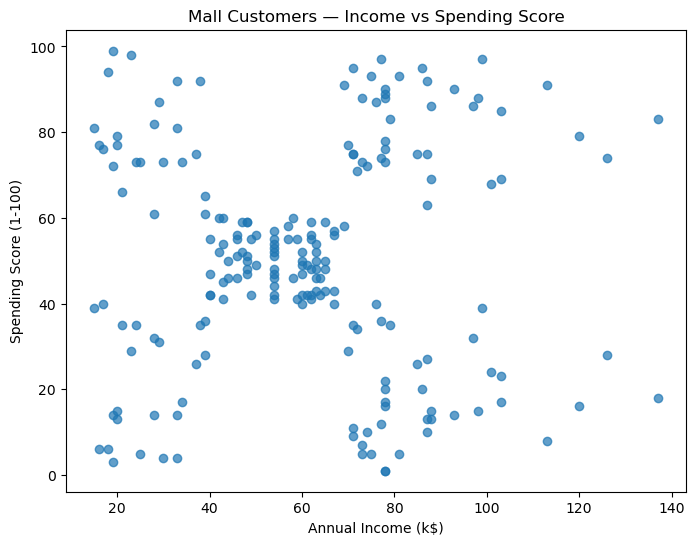

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], alpha=0.7)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Mall Customers — Income vs Spending Score")
plt.show()


## Preparing Features for K-Means

K-Means requires numerical features and benefits from scaling.  
Here, we focus on:

- **Annual Income (k$)**
- **Spending Score (1–100)**

These two features create a natural 2D cluster structure.


In [6]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values


## Elbow Method to Choose k

K-Means requires specifying the number of clusters *k*.  
The elbow method plots the total within-cluster sum of squares (WCSS) for different *k* values.

We look for a point where the curve "bends" — the elbow.


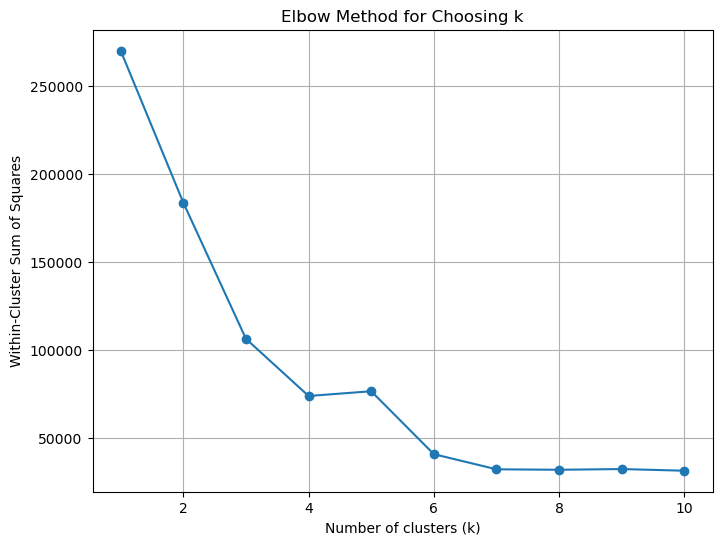

In [7]:
wcss = []

for k in range(1, 11):
    model = KMeans(n_clusters=k, max_iter=300)
    model.fit(X)
    wcss.append(model.inertia_)  # inertia_ = sum of squared distances

plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares")
plt.title("Elbow Method for Choosing k")
plt.grid(True)
plt.show()


## Interpretation of the Elbow Plot

The elbow plot provides guidance on selecting the number of clusters by displaying the within-cluster sum of squares (WCSS) for values of \( k \) from 1 to 10. The goal is to identify a point where adding more clusters no longer yields substantial improvements in compactness.

In this dataset, the WCSS decreases rapidly between \( k = 1 \) and \( k = 5 \), after which the curve begins to flatten. This “elbow” around \( k = 5 \) suggests that five clusters capture the main structure in the data while avoiding unnecessary fragmentation. This aligns with typical analyses of the Mall Customers dataset, where income and spending behavior naturally form about five segments.


## Fit K-Means with k = 5

Based on the elbow plot, the Mall Customers dataset is typically well-clustered with **k = 5** clusters.

We now run K-Means with `k = 5` using the custom implementation in our package.


In [9]:
kmeans = KMeans(n_clusters=5, max_iter=300)
labels = kmeans.fit_predict(X)

labels[:10]


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2])

## Visualizing the Clusters

We now plot:

- Each data point colored by cluster assignment  
- Centroids shown as large 'X' markers  

This is the main output for demonstrating K-Means performance.


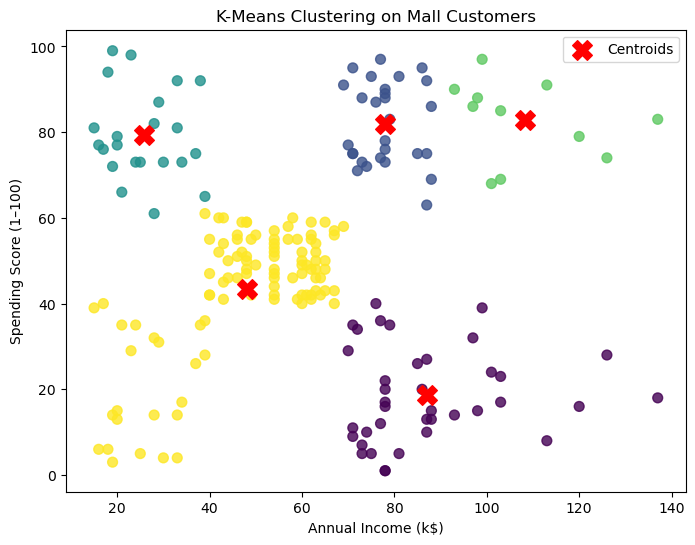

In [11]:
plt.figure(figsize=(8,6))

plt.scatter(
    X[:,0], X[:,1],
    c=labels,
    cmap="viridis",
    s=50,
    alpha=0.8
)

# Plot centroids
centroids = kmeans.centroids_
plt.scatter(
    centroids[:,0], centroids[:,1],
    c="red",
    marker="X",
    s=200,
    label="Centroids"
)

plt.title("K-Means Clustering on Mall Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.legend()
plt.show()


## Interpretation of the Cluster Structure

The scatterplot of Spending Score versus Annual Income reveals several well-separated customer groups identified by K-Means:

- **High income, high spending**: Customers in this cluster have strong purchasing power and exhibit high spending behavior. They represent a profitable segment for targeted promotions.
- **High income, low spending**: These customers have the financial capacity to spend more but do not currently do so. They may benefit from engagement strategies or loyalty programs.
- **Low income, high spending**: This group has modest income but scores high on spending. They may be motivated by lifestyle choices or specific product preferences.
- **Middle income, balanced spending**: These customers fall near the center of the income–spending space and may represent a general consumer population.
- **Low income, low spending**: This segment is the least engaged group, with limited purchasing activity.

These patterns illustrate how clustering can uncover meaningful consumer segments without requiring labeled data. The resulting groups align with intuitive marketing categories and demonstrate the value of K-Means for exploratory segmentation.


## Cluster Statistics

To summarize the characteristics of each cluster, I compute mean feature values and cluster sizes.


In [14]:
df_clusters = df.copy()
df_clusters["Cluster"] = labels

cluster_summary = df_clusters.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].agg(["mean", "std", "count"])
cluster_summary


Annual Income (k$)                  Spending Score (1-100)             \
                      mean        std count                   mean        std   
Cluster                                                                         
0                87.000000  16.271348    38              18.631579  10.915947   
1                78.035714   6.009142    28              81.892857   9.550409   
2                25.727273   7.566731    22              79.363636  10.504174   
3               108.181818  13.998701    11              82.727273   9.296138   
4                48.168317  14.519001   101              43.396040  14.707875   

               
        count  
Cluster        
0          38  
1          28  
2          22  
3          11  
4         101

## Conclusion

This notebook applied K-Means clustering to the Mall Customers dataset to explore natural groupings in customer behavior. By focusing on Annual Income and Spending Score, the analysis highlighted distinct customer segments that reflect meaningful differences in purchasing patterns.

The elbow method suggested \( k = 5 \) as a reasonable number of clusters, and the resulting segmentation produced interpretable groups such as high-income/high-spending customers, low-income/low-spending customers, and several intermediate categories. These clusters demonstrate how K-Means can be used to support customer profiling, targeted marketing strategies, and data-driven decision making in retail settings.

Overall, the example illustrates how the `rice2025` implementation of K-Means provides a transparent and effective tool for unsupervised learning tasks.


## Limitations of K-Means

While K-Means performs well on this dataset, it has several limitations:

- It assumes clusters are spherical and roughly equal in size.  
- It is sensitive to outliers, which can distort centroid locations.  
- It requires selecting \( k \) in advance, which may not always be straightforward.  
- It may converge to a local minimum depending on the initialization.

These considerations are important when applying K-Means to more complex or high-dimensional datasets.


## Summary

In this notebook, we:

1. Loaded and explored the Mall Customers dataset  
2. Visualized the natural structure in Income–Spending Score space  
3. Used the **elbow method** to determine that `k = 5` is a reasonable choice  
4. Ran K-Means clustering using the custom `rice2025` implementation  
5. Visualized the resulting clusters and centroids  

